In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')

#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow import keras
from keras import layers
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

from distutils.dir_util import copy_tree, remove_tree

import os
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

In [2]:
#!pip install split-folders
#import splitfolders
#splitfolders.ratio('kaggle kernels output akashgw/ad-detection-with-99-53-accuracy -p /path/to/dest', output="output", seed=1345, ratio=(.8, 0.1,0.1))

In [3]:
#import splitfolders
#splitfolders.ratio('setdata/Dataset', output="outputs", seed=1345, ratio=(.8, 0.1,0.1))

In [4]:
#import zipfile as zp
#files=zp.ZipFile('archivevv.zip','r')
#files.extractall('setdata')
#files.close()

In [5]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"D:/nithish/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"D:\\nithish\\dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [6]:
class_name=train_ds.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [7]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

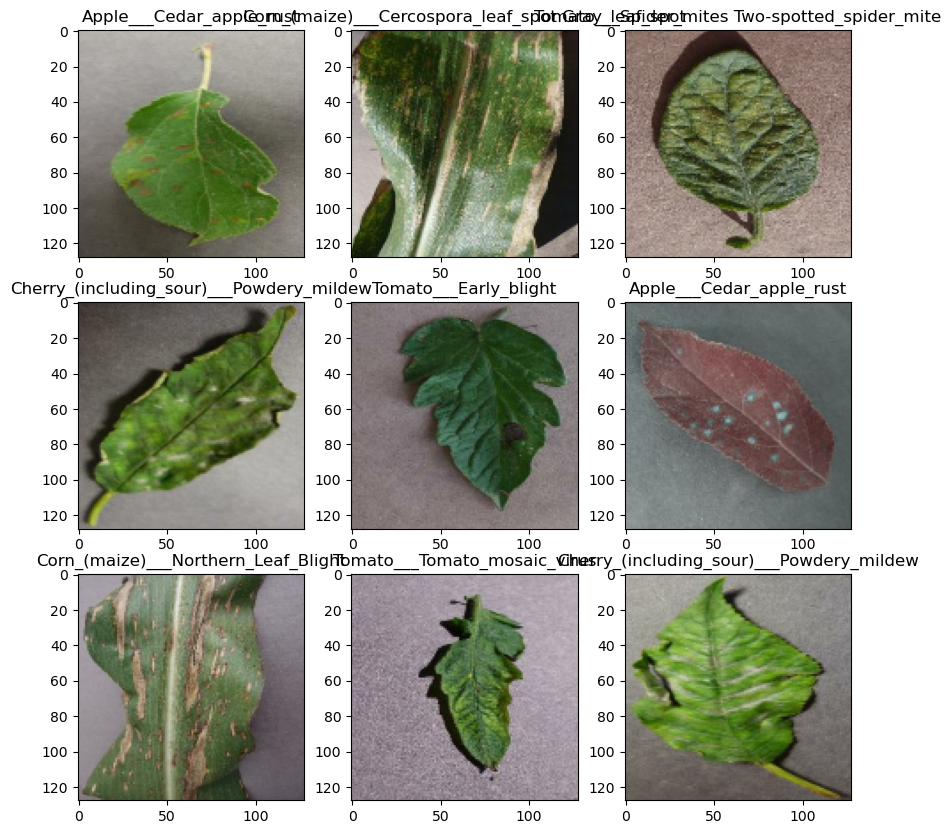

In [8]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])

In [9]:
img=cv2.imread("D:/nithish/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_new30degFlipLR.JPG")

In [10]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

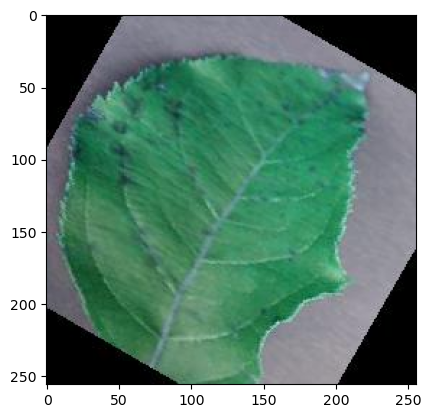

In [11]:
plt.imshow(img)


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(38,"softmax"))

In [13]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [36]:
hist = model.fit(train_ds,validation_data=val_ds,epochs = 10,verbose=1,batch_size = 64)


Epoch 1/10
1099/1099 [==============================] - 1415s 1s/step - loss: 0.5197 - accuracy: 0.8361 - val_loss: 0.4065 - val_accuracy: 0.8749
Epoch 2/10
1099/1099 [==============================] - 983s 886ms/step - loss: 0.3530 - accuracy: 0.8852 - val_loss: 0.3681 - val_accuracy: 0.8796
Epoch 3/10
1099/1099 [==============================] - 824s 749ms/step - loss: 0.2594 - accuracy: 0.9142 - val_loss: 0.2533 - val_accuracy: 0.9181
Epoch 4/10
1099/1099 [==============================] - 1600s 1s/step - loss: 0.2011 - accuracy: 0.9335 - val_loss: 0.2933 - val_accuracy: 0.9060
Epoch 5/10
1099/1099 [==============================] - 32373s 29s/step - loss: 0.1678 - accuracy: 0.9437 - val_loss: 0.2461 - val_accuracy: 0.9207
Epoch 6/10
1099/1099 [==============================] - 1118s 1s/step - loss: 0.1493 - accuracy: 0.9497 - val_loss: 0.1883 - val_accuracy: 0.9412
Epoch 7/10
1099/1099 [==============================] - 821s 746ms/step - loss: 0.1272 - accuracy: 0.9571 - val_loss: 

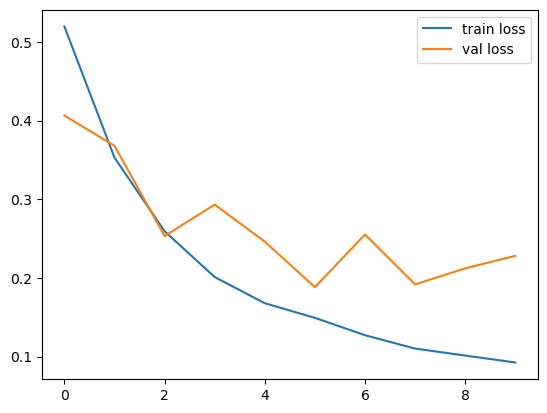

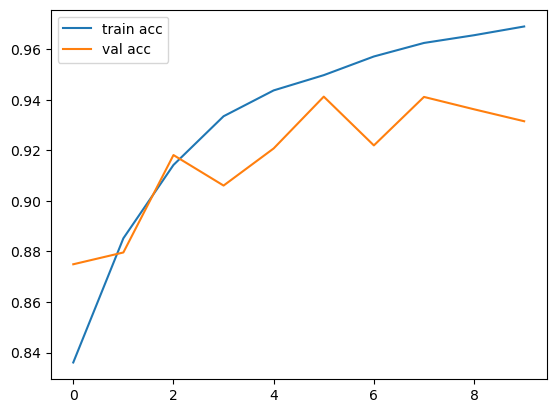

<Figure size 640x480 with 0 Axes>

In [37]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:

from tensorflow.keras.models import load_model

model.save('CNN(1).h5')

In [39]:
from tensorflow.keras.preprocessing import image
img=image.load_img("D:\\nithish\\dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus\\13364b53-0b4d-43da-8543-6e17de421712___UF.GRC_YLCV_Lab 01665.JPG",target_size=(128,128))

In [40]:
test_data = tf.keras.preprocessing.image.load_img(
"D:\\nithish\\dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus\\13364b53-0b4d-43da-8543-6e17de421712___UF.GRC_YLCV_Lab 01665.JPG",
#seed=123,
target_size=(128,128),
#batch_size=64
)

In [41]:
test_data=image.img_to_array(test_data)

In [42]:
test_data=np.expand_dims(test_data,axis=0)

In [43]:
predicted=model.predict(test_data)

1/1 [==============================] - 0s 93ms/step


In [45]:
pred = np.argmax(predicted, axis=1)
y=pred[0]
print(y)
print(class_name[y])

35
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [48]:
test_data=tf.keras.preprocessing.image_dataset_from_directory('D:\\nithish\\plant diseas\\test_data',
                                                       image_size=(128,128))

Found 6 files belonging to 1 classes.


In [50]:
test_predict=model.predict(test_data)

1/1 [==============================] - 0s 58ms/step


In [53]:
np.argmax(test_predict, axis=1)

array([11, 11, 11, 11, 11, 11], dtype=int64)

In [51]:
pred = np.argmax(test_predict, axis=1)
y=pred[0]
print(y)
print(class_name[y])

11
Grape___Black_rot
